In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('sales_data_challenge.csv')
df.head()

,order_id,date,product_id,category,price,quantity,customer_region
0,1,2025-01-20,P043,Electronics,5.14,5,East
1,2,2024-11-15,P048,Books,54.07,1,East
2,3,2024-12-08,P030,Home,256.96,5,North
3,4,2024-12-22,P031,Books,205.12,1,West
4,5,2024-11-18,P049,Clothing,150.13,5,West


In [59]:
df[df['product_id'] == 'P043']['category'].value_counts()

category
Electronics    5
Books          5
Toys           4
Home           3
Clothing       2
Name: count, dtype: int64

In [61]:
df[df['product_id'] == 'P043']

,order_id,date,product_id,category,price,quantity,customer_region,unit_price
0,1,2025-01-20,P043,Electronics,5.14,5,East,1.028000
65,66,2025-03-11,P043,Home,268.44,3,West,89.480000
85,86,2025-01-28,P043,Home,235.98,2,South,117.990000
176,177,2025-02-10,P043,Books,107.24,5,North,21.448000
234,235,2025-02-25,P043,Home,152.28,1,North,152.280000
249,250,2025-05-16,P043,Books,123.72,2,West,61.860000
300,301,2025-04-03,P043,Toys,100.09,2,West,50.045000
312,313,2025-05-10,P043,Books,226.20,1,West,226.200000
314,315,2025-03-23,P043,Books,174.87,3,South,58.290000
561,562,2025-01-29,P043,Electronics,233.49,1,West,233.490000


In [63]:
df['customer_region'].value_counts()

customer_region
North    265
West     261
East     245
South    229
Name: count, dtype: int64

In [64]:
# Notes

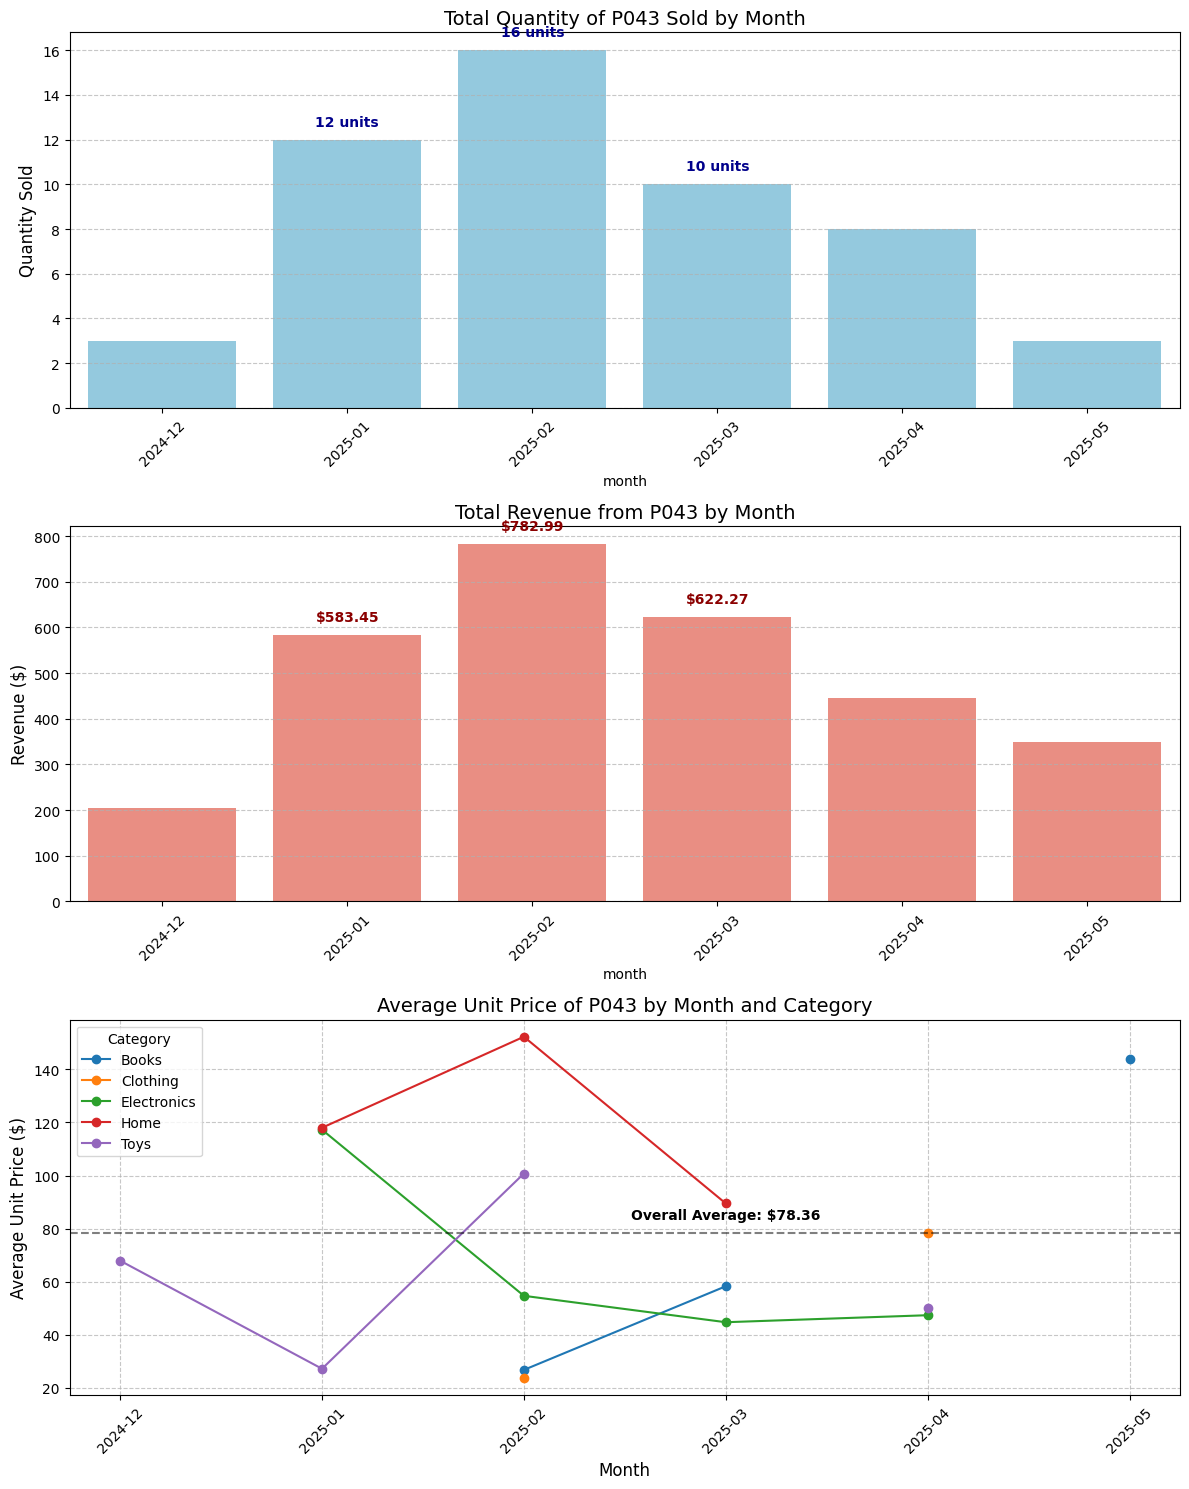

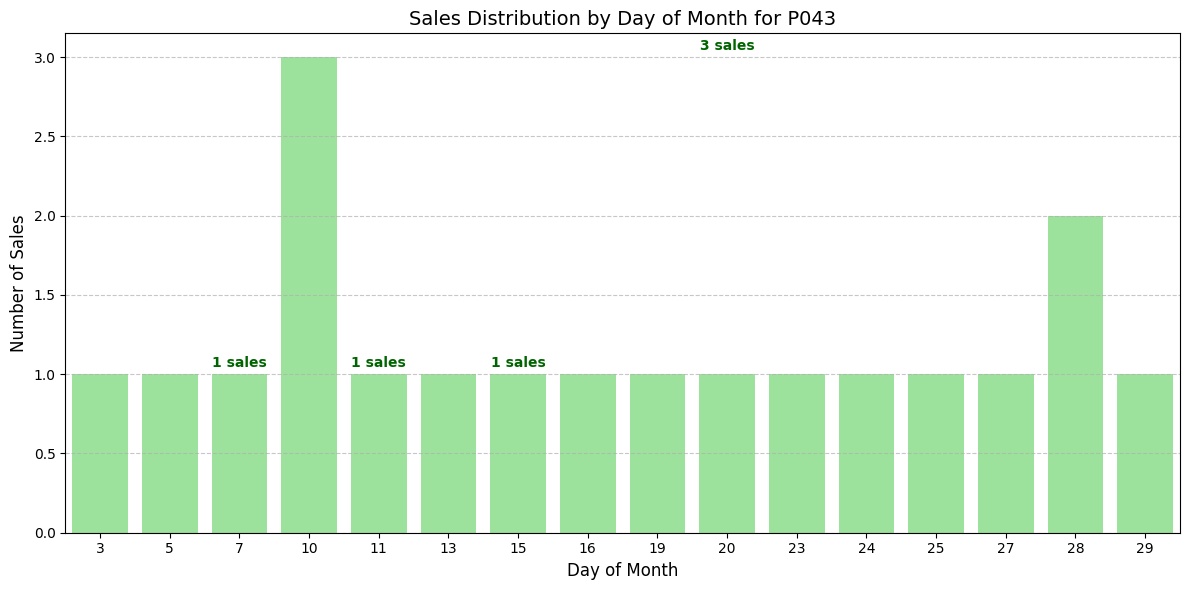

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

def visualize_sales_periods(data):
    # Filter for product P043
    p043_data = data[data['product_id'] == 'P043'].copy()
    
    # Ensure date is in datetime format
    p043_data['date'] = pd.to_datetime(p043_data['date'])
    
    # Group by month and create a string representation for plotting
    p043_data['month'] = p043_data['date'].dt.strftime('%Y-%m')
    
    # Calculate monthly aggregates
    monthly_qty = p043_data.groupby('month')['quantity'].sum().reset_index()
    monthly_revenue = p043_data.groupby('month')['price'].sum().reset_index()
    
    # Calculate average unit price by month and category
    category_month_price = p043_data.groupby(['month', 'category'])['unit_price'].mean().reset_index()
    
    # Create the figure with multiple subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot 1: Total quantity sold per month
    sns.barplot(x='month', y='quantity', data=monthly_qty, ax=axes[0], color='skyblue')
    axes[0].set_title('Total Quantity of P043 Sold by Month', fontsize=14)
    axes[0].set_ylabel('Quantity Sold', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate the peak selling periods
    top_months = monthly_qty.nlargest(3, 'quantity')
    for _, row in top_months.iterrows():
        axes[0].annotate(f"{row['quantity']} units", 
                        xy=(monthly_qty['month'].tolist().index(row['month']), row['quantity']),
                        xytext=(0, 10),
                        textcoords='offset points',
                        ha='center',
                        fontweight='bold',
                        color='darkblue')
    
    # Plot 2: Total sales value per month
    sns.barplot(x='month', y='price', data=monthly_revenue, ax=axes[1], color='salmon')
    axes[1].set_title('Total Revenue from P043 by Month', fontsize=14)
    axes[1].set_ylabel('Revenue ($)', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate the peak revenue periods
    top_revenue_months = monthly_revenue.nlargest(3, 'price')
    for _, row in top_revenue_months.iterrows():
        axes[1].annotate(f"${row['price']:.2f}", 
                        xy=(monthly_revenue['month'].tolist().index(row['month']), row['price']),
                        xytext=(0, 10),
                        textcoords='offset points',
                        ha='center',
                        fontweight='bold',
                        color='darkred')
    
    # Plot 3: Average unit price by month and category
    # Convert to pivot table for easier plotting
    pivot_data = category_month_price.pivot(index='month', columns='category', values='unit_price')
    pivot_data.plot(kind='line', marker='o', ax=axes[2])
    
    axes[2].set_title('Average Unit Price of P043 by Month and Category', fontsize=14)
    axes[2].set_xlabel('Month', fontsize=12)
    axes[2].set_ylabel('Average Unit Price ($)', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].legend(title='Category')
    
    # Add a horizontal line for overall average price
    avg_price = p043_data['unit_price'].mean()
    axes[2].axhline(y=avg_price, color='black', linestyle='--', alpha=0.5)
    axes[2].annotate(f'Overall Average: ${avg_price:.2f}', 
                    xy=(len(pivot_data)//2, avg_price),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout()
    
    # Create a fourth plot to show day-of-month patterns
    plt.figure(figsize=(12, 6))
    p043_data['day'] = p043_data['date'].dt.day
    
    day_counts = p043_data.groupby('day').size().reset_index(name='count')
    
    sns.barplot(x='day', y='count', data=day_counts, color='lightgreen')
    plt.title('Sales Distribution by Day of Month for P043', fontsize=14)
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel('Number of Sales', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Highlight the days with most sales
    top_days = day_counts.nlargest(5, 'count')
    for _, row in top_days.iterrows():
        plt.annotate(f"{row['count']} sales", 
                    xy=(row['day']-1, row['count']),  # -1 adjustment for proper alignment
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    fontweight='bold',
                    color='darkgreen')
    
    plt.tight_layout()
    plt.show()

# Load the data and calculate unit price
df = pd.read_csv('sales_data_challenge.csv')
df['unit_price'] = df['price'] / df['quantity']

# Call the function
visualize_sales_periods(df)

Although I can for sure generate plots and analysis based on the data provided in terms of:
 * Quantity / price ratio
 * dates where we've most sold the products
 * the most sold categories ...


this can't happen becasue the data provided doesn't have any clear pattern and I feel like it was created by `faker`. Maybe I'm missing something or I'm extremely wrong. Or maybe there are areas where there are potential cleaning. But I can't find any. 


the product id P043 example exist in all the catgeories with a different unit price. I thought I can find the real price by seeing the most frequent unit price but there's simply no repeating price :(


    See the json file generated. 



But since dates seem the only TRUE pattern that can give sense : January, February and March are the top sales months


